In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("test_comments_2 - Sheet1.csv")

In [ ]:
df.head()

,comments,target
0,"I've learnt HTML, CSS, Javascript and Python a...",s
1,Watched this video one year ago to start my co...,s
2,His teaching is the most effective I've found ...,s
3,"I finally finished the whole 4 hours, and now ...",p
4,It took me 3 days to finish this. It's very ea...,p


In [ ]:
df.shape

(1998, 2)

In [ ]:
df.isnull().sum()

comments    0
target      4
dtype: int64

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.shape

(1994, 2)

In [ ]:
df.isnull().sum()

comments    0
target      0
dtype: int64

In [ ]:
df['target'].value_counts()

p    902
o    467
q    335
s    290
Name: target, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1997
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   comments  1994 non-null   object
 1   target    1994 non-null   object
dtypes: object(2)
memory usage: 46.7+ KB


In [ ]:
df['comments'] = df['comments'].str.replace("[^a-zA-Z?!#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df

,comments,target
0,I ve learnt HTML CSS Javascript and Python a...,s
1,Watched this video one year ago to start my co...,s
2,His teaching is the most effective I ve found ...,s
3,I finally finished the whole hours and now ...,p
4,It took me days to finish this It s very ea...,p
...,...,...
1993,i love cpp because its simple and good for pro...,p
1994,Thank you It was very well explained and help...,p
1995,,o
1996,I ABSOLUTELY LOVED IT THANK YOU VERY MUCH,p


In [ ]:
X = df['comments']
y = df['target']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, stratify=y,random_state=42)

In [ ]:
y_train.value_counts()

p    812
o    420
q    301
s    261
Name: target, dtype: int64

In [ ]:
y_test.value_counts()

p    90
o    47
q    34
s    29
Name: target, dtype: int64

In [ ]:
X_train

370           Note that you cannot put  phrase       B...
896     If you know C first    hrs is enough     Rest ...
864                Dont mind me  Just keeping track   ...
211     Life saver!  Uni s may as well show this conci...
1331    I tried a few other intro to C   videos before...
                              ...                        
1408    I really wanted to study at home but I don t h...
239     I am here because the following week my c   cl...
270     Good teacher  which is rare in this field  See...
720     Mike thanks a million   I especially enjoyed y...
735     Hey i downloaded the mingw setup  but still go...
Name: comments, Length: 1794, dtype: object

In [ ]:
train_sentences = X_train.to_list()
test_sentences = X_test.to_list()

In [ ]:
# One hot encode labels
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)
train_labels_one_hot = one_hot_encoder.fit_transform(y_train.to_numpy().reshape(-1, 1))
test_labels_one_hot = one_hot_encoder.transform(y_test.to_numpy().reshape(-1, 1))

# check what one hot encoded labels look like
train_labels_one_hot

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.]])

In [ ]:
from sklearn.preprocessing import LabelEncoder 
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(y_train.to_numpy())
test_label_encoded = label_encoder.transform(y_test.to_numpy())

# check what training labels look like
train_labels_encoded

array([3, 3, 0, ..., 1, 1, 2])

In [ ]:
num_classes = len(label_encoder.classes_)
class_names = label_encoder.classes_
num_classes, class_names

(4, array(['o', 'p', 'q', 's'], dtype=object))

## Preparing our data (the text) for deep sequence models

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
# how long is each sentence on average ?
sent_lens = [len(sentences.split()) for sentences in train_sentences]
avg_sent_lens = np.mean(sent_lens)
avg_sent_lens

20.644370122630992

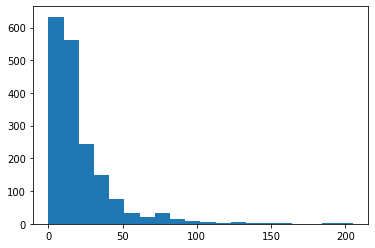

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=20);

In [ ]:
# How long of a setnence lenght covers 95% of examples?
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

64

In [ ]:
max(sent_lens)

205

### Create text vectorization layer


In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(output_sequence_length = output_seq_len)

In [ ]:
text_vectorizer.adapt(train_sentences)

In [ ]:
import random
target_sentence = random.choice(train_sentences)
print(f"Text:\n{target_sentence}")
print(f"\nLength of text: {len(target_sentence.split())}")
print(f"\nVectorized text: {text_vectorizer([target_sentence])}")

Text:
Well done Mike! Very clear and understandable  You have a great personality and delivery for these types of videos 

Length of text: 19

Vectorized text: [[  79  200   66   44  277    8  470    6   27    4   48 2282    8 1588
    12  169  279   14  155    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]]


In [ ]:
yt_comments_text_vocab = text_vectorizer.get_vocabulary()
print(f"Number of words in vocab: {len(yt_comments_text_vocab)}")
print(f"Most common words in the vocab: {yt_comments_text_vocab[:5]}")
print(f"Least common words in the vocab: {yt_comments_text_vocab[-5:]}")

Number of words in vocab: 3294
Most common words in the vocab: ['', '[UNK]', 'i', 'the', 'a']
Least common words in the vocab: ['absence', 'abrupt', 'above', 'abilities', 'aayaaa']


In [ ]:
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'idf_weights': None,
 'max_tokens': None,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 64,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary': None}

## Create custom text embedding

In [ ]:
# Create token embedding layer
token_embed = layers.Embedding(input_dim = len(yt_comments_text_vocab),
                               output_dim = 128,
                               mask_zero = True,
                               name = "token_embedding")

In [ ]:
# Show example embedding
print(f"Sentence before vectorization:\n {target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n {vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n {embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
 Well done Mike! Very clear and understandable  You have a great personality and delivery for these types of videos 

Sentence after vectorization (before embedding):
 [[  79  200   66   44  277    8  470    6   27    4   48 2282    8 1588
    12  169  279   14  155    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0]]

Sentence after embedding:
 [[[-0.03069863 -0.01561354 -0.02183708 ... -0.02760247  0.03377595
    0.00150744]
  [ 0.04754115  0.02665031 -0.0193957  ...  0.03987024 -0.01259035
    0.00971395]
  [-0.04397038  0.01051644  0.0114022  ...  0.04319098 -0.00605176
   -0.03041822]
  ...
  [-0.03664418 -0.01932259 -0.02390077 ...  0.03852923  0.04145045
    0.01922807]
  [-0.03664418 -0.01932259 -0.02390077 ...  0.03852923  0.04145045
    0.01922807]
  [-0.03664418 -0.01

## Creating Datasets

In [ ]:
# Turn our data into TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((train_sentences, train_labels_one_hot))
test_dataset = tf.data.Dataset.from_tensor_slices((test_sentences, test_labels_one_hot))

train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(4,), dtype=tf.float64, name=None))>

In [ ]:
# Take the TensorSliceDataset's and turn them into prefetched batches
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None, 4), dtype=tf.float64, name=None))>

## Model 2: Feature extraction with pretrained token embedding

In [ ]:
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False,
                                        name="universal_sentence_encoder")

In [ ]:
random_train_sentence = random.choice(train_sentences)
print(f"Random sentence:\n {random_train_sentence}")
use_embedded_sentence = tf_hub_embedding_layer([random_train_sentence])
print(f"Setence after embedding:\n{use_embedded_sentence[0][:30]}\n")
print(f"Length of sentence embedding: {len(use_embedded_sentence[0])}")

Random sentence:
   Jim and Pam      Someone who has watched the Office 
Setence after embedding:
[ 0.05175815  0.06097346 -0.03661058 -0.0152378   0.05543878  0.03589327
  0.05970782 -0.00074258 -0.03214323  0.01771715 -0.02889378 -0.06835857
  0.00904546 -0.03438331 -0.01124823 -0.0785576   0.0266153   0.033163
 -0.00155212 -0.03753167  0.05720804 -0.00962511  0.0184453  -0.04069668
  0.02126196 -0.01168624 -0.07810859  0.03809431 -0.03299234 -0.07895615]

Length of sentence embedding: 512


In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs)

x = layers.Dense(512, activation='relu')(pretrained_embedding)
x = layers.Dropout(0.2)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(128, activation='relu')(x)
# x = layers.Dense(32, activation='relu')(x)
# x = layers.Dense(16, activation='relu')(x)
# x = layers.Dense(8, activation='relu')(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)
model_2 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_2_USE_feature_extractor")

early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min',
                                                  verbose = 1, patience = 5)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                                                 patience=5, min_lr=0.00001)


model_2.compile(loss = 'categorical_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.0001),
                metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
model_2.summary()

Model: "model_2_USE_feature_extractor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense (Dense)               (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                     

In [ ]:
history_model_2 = model_2.fit(train_dataset,
                              epochs=50,
                              validation_data=test_dataset,
                              callbacks = [early_stopping,reduce_lr])

Epoch 1/50
57/57 [==============================] - 5s 30ms/step - loss: 1.3079 - accuracy: 0.4822 - val_loss: 1.1863 - val_accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/50
57/57 [==============================] - 1s 20ms/step - loss: 1.0899 - accuracy: 0.5039 - val_loss: 0.9949 - val_accuracy: 0.5450 - lr: 1.0000e-04
Epoch 3/50
57/57 [==============================] - 1s 19ms/step - loss: 0.9222 - accuracy: 0.6148 - val_loss: 0.8722 - val_accuracy: 0.6700 - lr: 1.0000e-04
Epoch 4/50
57/57 [==============================] - 1s 20ms/step - loss: 0.8160 - accuracy: 0.6957 - val_loss: 0.7916 - val_accuracy: 0.6950 - lr: 1.0000e-04
Epoch 5/50
57/57 [==============================] - 1s 20ms/step - loss: 0.7341 - accuracy: 0.7191 - val_loss: 0.7326 - val_accuracy: 0.7150 - lr: 1.0000e-04
Epoch 6/50
57/57 [==============================] - 1s 20ms/step - loss: 0.6634 - accuracy: 0.7475 - val_loss: 0.6873 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 7/50
57/57 [==============================] - 

In [ ]:
model_2_preds = model_2.predict(test_sentences)

model_2_preds = tf.argmax(model_2_preds, axis=1)
model_2_preds

<tf.Tensor: shape=(200,), dtype=int64, numpy=
array([3, 1, 1, 3, 1, 1, 0, 0, 1, 0, 1, 2, 3, 0, 2, 0, 1, 1, 1, 1, 1, 3,
       0, 1, 3, 2, 1, 2, 3, 2, 1, 1, 1, 0, 2, 2, 1, 3, 0, 2, 1, 0, 1, 2,
       2, 2, 0, 0, 1, 2, 0, 1, 1, 1, 0, 0, 0, 2, 0, 1, 2, 1, 1, 1, 2, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 0, 1, 1, 1, 2, 1, 1,
       1, 2, 0, 1, 1, 0, 1, 2, 0, 1, 3, 1, 1, 3, 3, 2, 1, 2, 1, 0, 1, 3,
       1, 1, 1, 3, 1, 1, 1, 2, 1, 0, 1, 3, 1, 2, 1, 1, 2, 1, 2, 1, 2, 2,
       0, 0, 1, 3, 3, 3, 0, 0, 0, 2, 1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 3,
       1, 3, 0, 0, 1, 3, 3, 3, 1, 0, 3, 2, 1, 1, 0, 1, 1, 3, 1, 1, 0, 2,
       3, 0, 0, 1, 1, 3, 0, 2, 1, 1, 1, 1, 3, 1, 2, 2, 0, 0, 1, 3, 0, 0,
       3, 1])>

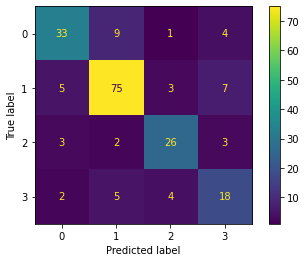

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

matrix_2 = confusion_matrix(y_true=test_label_encoded, y_pred=model_2_preds)

p2 = ConfusionMatrixDisplay(matrix_2)
p2.plot();

much better

In [57]:
model_2.save('/content/drive/MyDrive/model/model_2')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/model/model_2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/model/model_2/assets


In [ ]:
model_json = model_2.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model_2.save_weights("/content/drive/MyDrive/model/model.h5")
print("Saved model to disk")

Saved model to disk


In [ ]:
model_2.save('/content/drive/MyDrive/tensorflow_models/model.h5')

In [ ]:
loaded_model = tf.keras.models.load_model(('/content/drive/MyDrive/model/model.h5'),custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    log_loss,
    precision_score,
    recall_score,
    f1_score,
)

class EvaluateModel:
    def __init__(self, x_test, y_test, model):
        self.x_test = x_test
        self.y_test = y_test
        self.model = model

    def evaluate_model(self):
        print("Evaluating the model:- ")
        y_pred = self.model.predict(self.x_test)
        y_pred = tf.argmax(y_pred, axis=1)
        print("Accuracy Score:- ", accuracy_score(self.y_test, y_pred))
        print("Precision Score:- ", precision_score(self.y_test, y_pred))
        print("Recall Score:- ", recall_score(self.y_test, y_pred))
        print("F1 Score:- ", f1_score(self.y_test, y_pred))
        print(
            "Log Loss:- ", log_loss(self.y_test, self.model.predict_proba(self.x_test))
        )
        print("Completed evaluating the model")

In [ ]:
y_pred = tf.argmax(loaded_model.predict(test_sentences), axis=1)

In [ ]:
accuracy_score(y_pred, test_label_encoded)

0.76